# **Introduction**

# **Libraries and Datasets**

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as px
import matplotlib.dates as mdates
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Datasets

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/application_train.csv')
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Description

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Duplicated and Missing Values

## Missing Values

In [5]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
data_missing_value = df.isna().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,COMMONAREA_MEDI,214865,69.872
1,COMMONAREA_AVG,214865,69.872
2,COMMONAREA_MODE,214865,69.872
3,NONLIVINGAPARTMENTS_MODE,213514,69.433
4,NONLIVINGAPARTMENTS_AVG,213514,69.433
...,...,...,...
61,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332
62,EXT_SOURCE_2,660,0.215
63,AMT_GOODS_PRICE,278,0.090
64,AMT_ANNUITY,12,0.004


## Duplicated Values

In [7]:
df[df.duplicated(subset=['SK_ID_CURR'], keep=False)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


# Data Preparation

## Handling missing values

In [8]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

**AMT_ANNUITY**

In [9]:
#check AMT_ANNUITY missing value
df[(df['AMT_ANNUITY'].isna())]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [10]:
# handle with drop row
df = df.dropna(subset=['AMT_ANNUITY'])

**AMT_GOODS_PRICE**

In [11]:
#check AMT_GOODS_PRICE missing value
df[(df['AMT_GOODS_PRICE'].isna())]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [12]:
# handle with drop row
df = df.dropna(subset=['AMT_GOODS_PRICE'])

**NAME_TYPE_SUITE**

In [13]:
#check NAME_TYPE_SUITE missing value
df[(df['NAME_TYPE_SUITE'].isna())]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
2271,102661,0,Cash loans,F,N,N,0,225000.0,1890000.0,49986.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306130,454688,0,Cash loans,M,N,N,0,157500.0,225000.0,6448.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
306544,455158,0,Cash loans,F,N,N,0,180000.0,894825.0,23602.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
306615,455245,0,Cash loans,M,N,N,0,180000.0,225000.0,8469.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
306636,455270,0,Cash loans,M,Y,N,2,189000.0,677664.0,21406.5,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df['NAME_TYPE_SUITE'].describe()

count            306207
unique                7
top       Unaccompanied
freq             248515
Name: NAME_TYPE_SUITE, dtype: object

In [15]:
df['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

**OWN_CAR_AGE**

In [16]:
# we can check column OWN_CAR_AGE with FLAG_OWN_CAR
car = df[['FLAG_OWN_CAR','OWN_CAR_AGE']]
car[( (car['FLAG_OWN_CAR'] == 'N') & (car['OWN_CAR_AGE']).isnull() )].head()

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,NaN
1,N,NaN
3,N,NaN
4,N,NaN
5,N,NaN


In [17]:
car[( (car['FLAG_OWN_CAR'] == 'Y') & (car['OWN_CAR_AGE'].isnull()) )]

,FLAG_OWN_CAR,OWN_CAR_AGE
30897,Y,NaN
181231,Y,NaN
217549,Y,NaN
229867,Y,NaN
236868,Y,NaN


In [18]:
# we fill missing value with 0
df['OWN_CAR_AGE'].fillna( 0 , inplace=True)


**OCCUPATION_TYPE**

In [19]:
df[df['OCCUPATION_TYPE'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [20]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
# we fill missing value with others because
df['OCCUPATION_TYPE'].fillna( 'Others' , inplace=True)

**CNT_FAM_MEMBERS**

In [22]:
df['CNT_FAM_MEMBERS'].describe()

count    307221.000000
mean          2.152626
std           0.910623
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [23]:
df['CNT_FAM_MEMBERS'].fillna( df['CNT_FAM_MEMBERS'].median() , inplace=True)

**EXT_SOURCE_1, EXT_SOURCE_2. EXT_SOURCE_3**

In [24]:
ext = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN


In [25]:
# we check first to all ext source. if all ext source is nan we can remove the row. after that i can fill nan with 0
ext[( (ext['EXT_SOURCE_1'].isna()) & (ext['EXT_SOURCE_2'].isna()) & (ext['EXT_SOURCE_3'].isna()) )]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
349,NaN,NaN,NaN
3525,NaN,NaN,NaN
4562,NaN,NaN,NaN
7220,NaN,NaN,NaN
7402,NaN,NaN,NaN
...,...,...,...
301170,NaN,NaN,NaN
302204,NaN,NaN,NaN
305380,NaN,NaN,NaN
306208,NaN,NaN,NaN


In [26]:
#remove row 
df = df[~( (df['EXT_SOURCE_1'].isna()) & (df['EXT_SOURCE_2'].isna()) & (df['EXT_SOURCE_3'].isna()) )]


In [27]:
# fill nan
df['EXT_SOURCE_1'].fillna( 0  , inplace=True)
df['EXT_SOURCE_2'].fillna( 0  , inplace=True)
df['EXT_SOURCE_3'].fillna( 0  , inplace=True)



**ALL column about building where the client lives will be remove**

In [28]:
drop_living = ['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
                'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
                'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
                'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
                'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
                'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
                'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',
                'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',
                'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',
                'FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

df = df.drop(columns=drop_living , axis=1)

In [29]:
df['TARGET'].value_counts()

0    282259
1     24790
Name: TARGET, dtype: int64

**OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE , OBS_60_CNT_SOCIAL_CIRCLE , DEF_60_CNT_SOCIAL_CIRCLE**

In [30]:
#checking missing value
df[( (df['OBS_30_CNT_SOCIAL_CIRCLE'].isna()) & (df['DEF_30_CNT_SOCIAL_CIRCLE'].isna()) & (df['OBS_60_CNT_SOCIAL_CIRCLE'].isna()) & (df['DEF_60_CNT_SOCIAL_CIRCLE'].isna()) )]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
68,100080,0,Revolving loans,F,N,N,1,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
394,100457,0,Revolving loans,F,Y,Y,0,211500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
397,100460,0,Revolving loans,F,N,N,0,315000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
457,100527,0,Revolving loans,F,N,N,0,112500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1042,101209,0,Revolving loans,M,Y,N,0,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305526,453980,0,Revolving loans,F,Y,Y,2,72000.0,225000.0,11250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
305623,454093,0,Revolving loans,M,Y,Y,2,90000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305641,454116,0,Revolving loans,F,N,N,0,270000.0,765000.0,38250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305642,454117,0,Revolving loans,F,Y,Y,1,202500.0,765000.0,38250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#handle with fill 0

df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna( 0  , inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna( 0  , inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna( 0  , inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna( 0  , inplace=True)

In [32]:
# df = df.dropna(subset=['OBS_30_CNT_SOCIAL_CIRCLE'])
# df = df.dropna(subset=['DEF_30_CNT_SOCIAL_CIRCLE'])
# df = df.dropna(subset=['OBS_60_CNT_SOCIAL_CIRCLE'])
# df = df.dropna(subset=['DEF_60_CNT_SOCIAL_CIRCLE'])

**DAYS_LAST_PHONE_CHANGE**

In [33]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37622
-1.0        2812
-2.0        2316
-3.0        1763
-4.0        1284
           ...  
-3978.0        1
-3459.0        1
-3739.0        1
-4185.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [34]:
#handle with fill 0
df['DAYS_LAST_PHONE_CHANGE'].fillna( 0  , inplace=True)


**AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR**

In [35]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna( 0  , inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna( 0  , inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna( 0  , inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna( 0  , inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna( 0  , inplace=True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna( 0  , inplace=True)

In [36]:
# df = df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_HOUR'])
# df = df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_DAY'])
# df = df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_WEEK'])

# df = df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_MON'])
# df = df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_QRT'])
# df = df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_YEAR'])

**GENDER**

In [37]:
df['CODE_GENDER'].value_counts()

F      202108
M      104937
XNA         4
Name: CODE_GENDER, dtype: int64

In [38]:
df = df.reset_index(drop=True)
df[(df['CODE_GENDER'] == 'XNA')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35603,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38507,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83252,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189362,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [39]:
df = df.drop(df.index[[35603, 38507, 83252, 189362]])

In [40]:
df['TARGET'].value_counts()

0    282255
1     24790
Name: TARGET, dtype: int64

In [41]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307045 entries, 0 to 307048
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307045 non-null  int64  
 1   TARGET                       307045 non-null  int64  
 2   NAME_CONTRACT_TYPE           307045 non-null  object 
 3   CODE_GENDER                  307045 non-null  object 
 4   FLAG_OWN_CAR                 307045 non-null  object 
 5   FLAG_OWN_REALTY              307045 non-null  object 
 6   CNT_CHILDREN                 307045 non-null  int64  
 7   AMT_INCOME_TOTAL             307045 non-null  float64
 8   AMT_CREDIT                   307045 non-null  float64
 9   AMT_ANNUITY                  307045 non-null  float64
 10  AMT_GOODS_PRICE              307045 non-null  float64
 11  NAME_TYPE_SUITE              307045 non-null  object 
 12  NAME_INCOME_TYPE             307045 non-null  object 
 13 

In [42]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307044,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307045,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307046,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307047,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Pre-Processing & EDA

In [43]:
hci = df.reset_index(drop=True).copy()
hci

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307040,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307041,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307042,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307043,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
for column in hci.columns:
    print(f"============= {column} =================")
    print(hci[column].value_counts())
    print()

============= SK_ID_CURR =================
100002    1
337656    1
337654    1
337653    1
337652    1
         ..
218997    1
218996    1
218995    1
218994    1
456255    1
Name: SK_ID_CURR, Length: 307045, dtype: int64

============= TARGET =================
0    282255
1     24790
Name: TARGET, dtype: int64

============= NAME_CONTRACT_TYPE =================
Cash loans         278068
Revolving loans     28977
Name: NAME_CONTRACT_TYPE, dtype: int64

============= CODE_GENDER =================
F    202108
M    104937
Name: CODE_GENDER, dtype: int64

============= FLAG_OWN_CAR =================
N    202507
Y    104538
Name: FLAG_OWN_CAR, dtype: int64

============= FLAG_OWN_REALTY =================
Y    212970
N     94075
Name: FLAG_OWN_REALTY, dtype: int64

============= CNT_CHILDREN =================
0     215063
1      61009
2      26713
3       3707
4        427
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11 

### **NAME_CONTRACT_TYPE**

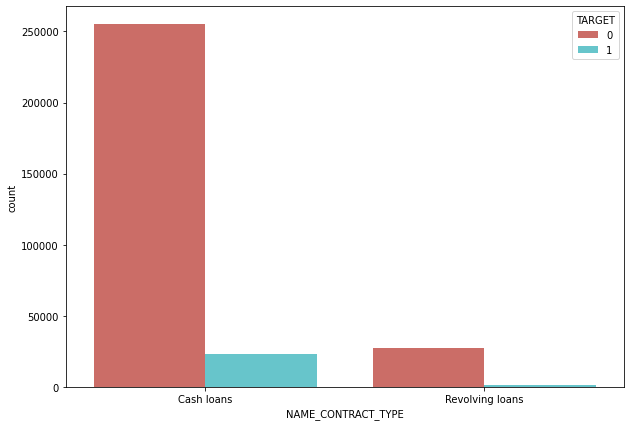

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='NAME_CONTRACT_TYPE', data=hci, hue='TARGET', palette='hls')

### **CODE_GENDER**

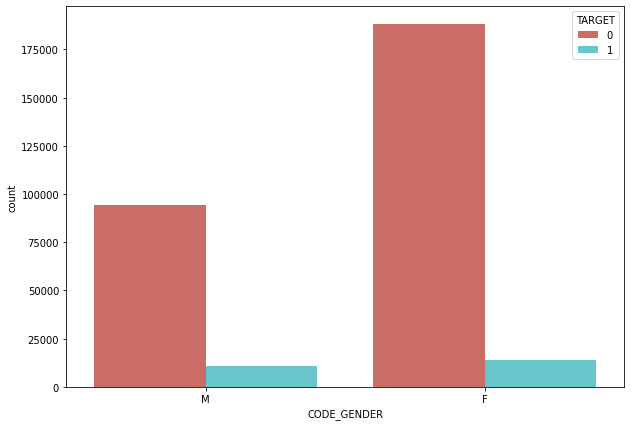

In [46]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER', data=hci, hue='TARGET', palette='hls')


### **FLAG_OWN_CAR**

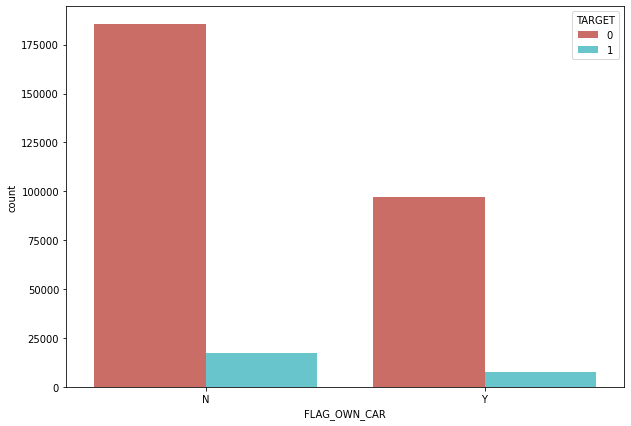

In [47]:
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.countplot(x='FLAG_OWN_CAR', data=hci, palette='hls', hue='TARGET')
plt.show()

**FLAG_OWN_REALTY**

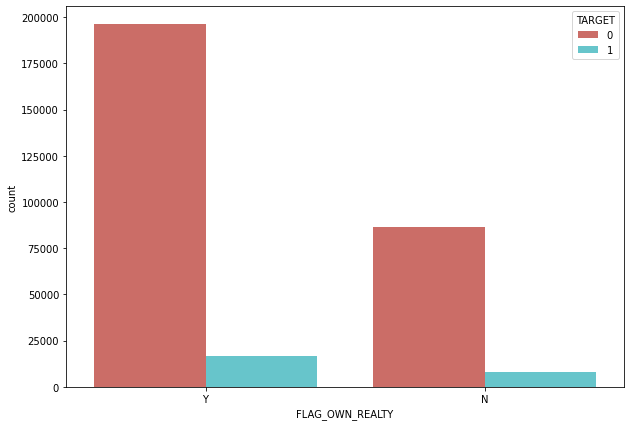

In [48]:
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.countplot(x='FLAG_OWN_REALTY', data=hci, palette='hls', hue='TARGET')
plt.show()

### **CNT_CHILDREN**

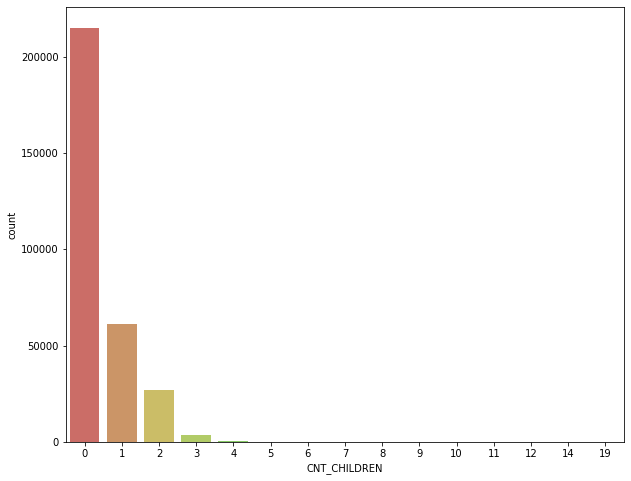

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='CNT_CHILDREN', data=hci, palette='hls')
plt.show()

### **AMT_INCOME_TOTAL**

In [50]:
hci['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count       307045.000000
mean        168846.144611
std         237280.296822
min          25650.000000
25%         112500.000000
50%         148500.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [51]:
def cat_income(x):
  if x < 100000 :
    return '< 100K'
  elif (x >= 100000) & ( x < 150000 ) :
    return '100K - 150K'
  elif (x >= 150000) & ( x < 200000 ) :
    return '150K - 200K'
  elif x >= 200000 :
    return '> 200K'

In [52]:
income = hci[['SK_ID_CURR','TARGET','AMT_INCOME_TOTAL']]
income['INCOME_CATEGORY'] = income['AMT_INCOME_TOTAL'].apply(cat_income)
income

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,INCOME_CATEGORY
0,100002,1,202500.0,> 200K
1,100003,0,270000.0,> 200K
2,100004,0,67500.0,< 100K
3,100006,0,135000.0,100K - 150K
4,100007,0,121500.0,100K - 150K
...,...,...,...,...
307040,456251,0,157500.0,150K - 200K
307041,456252,0,72000.0,< 100K
307042,456253,0,153000.0,150K - 200K
307043,456254,1,171000.0,150K - 200K


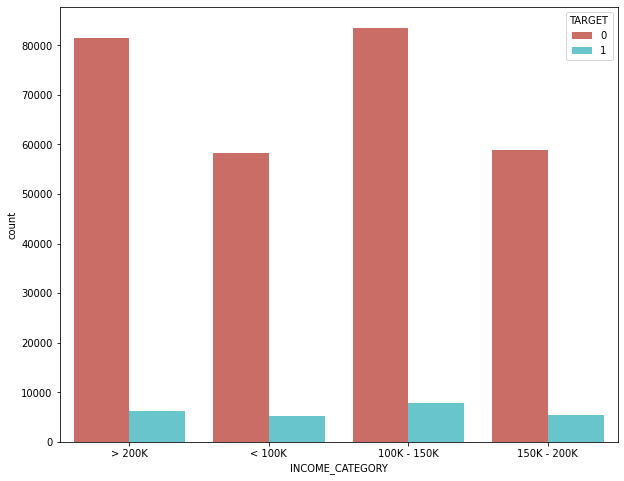

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='INCOME_CATEGORY', data=income, palette='hls', hue='TARGET')
plt.show()

### **NAME_TYPE_SUITE**

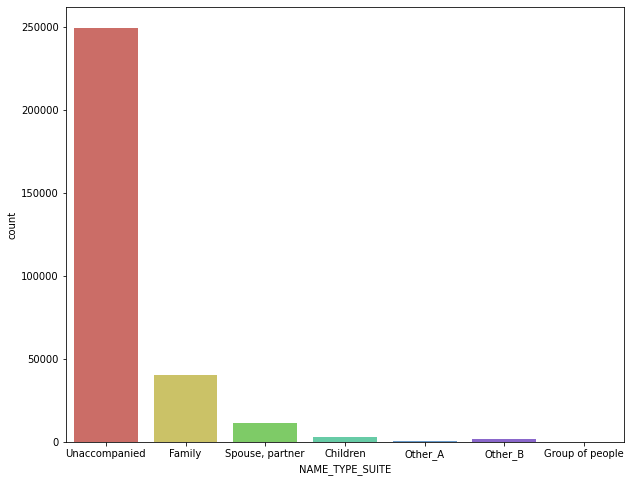

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='NAME_TYPE_SUITE', data=hci, palette='hls')
plt.show()

In [55]:
def companied(x):
  if x != 'Unaccompanied':
    return 'Accompanied'
  else:
    return x

In [56]:
hci['NAME_TYPE_SUITE'] = hci['NAME_TYPE_SUITE'].apply(companied)
hci['NAME_TYPE_SUITE'].value_counts()

Unaccompanied    249393
Accompanied       57652
Name: NAME_TYPE_SUITE, dtype: int64

### **NAME_INCOME_TYPE**

In [57]:
def barPerc(df,xVar,ax):

    numX=len([x for x in df[xVar].unique() if x==x])

    bars = ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])

        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

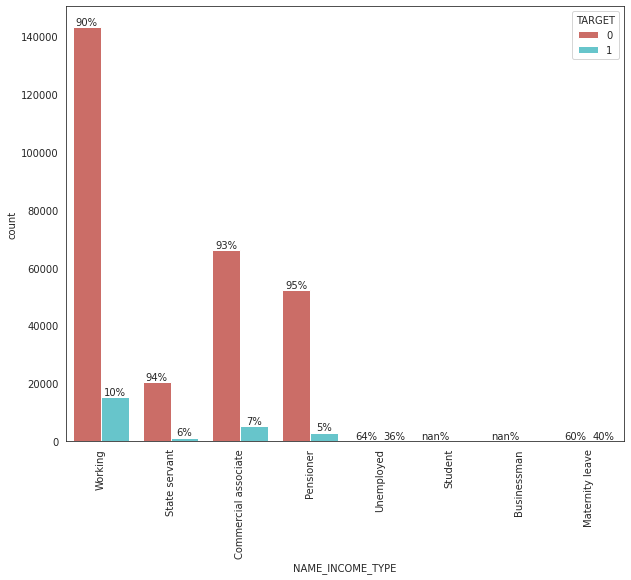

In [122]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='NAME_INCOME_TYPE', data=hci, palette='hls', hue='TARGET')
plt.xticks(rotation=90)
barPerc(hci,'NAME_INCOME_TYPE',ax)
plt.show()

In [59]:
hci['NAME_INCOME_TYPE'].value_counts()

Working                 158503
Commercial associate     71513
Pensioner                55307
State servant            21667
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

### **NAME_EDUCATION_TYPE**

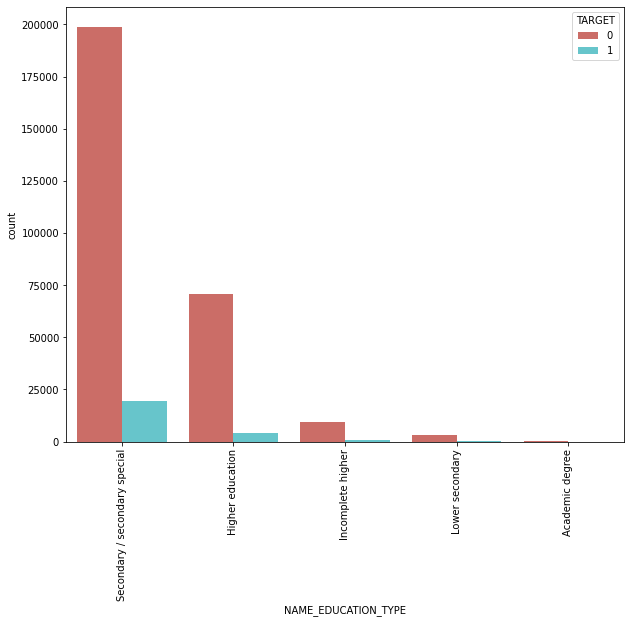

In [60]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='NAME_EDUCATION_TYPE', data=hci, palette='hls', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

### **NAME_FAMILY_STATUS**

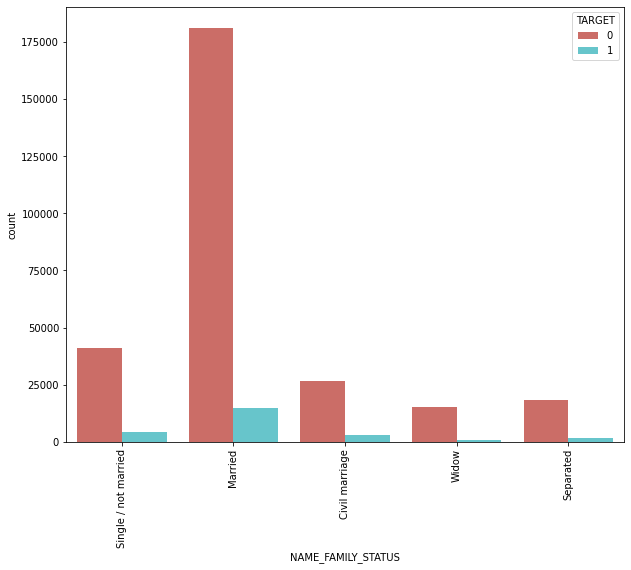

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='NAME_FAMILY_STATUS', data=hci, palette='hls', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

We will change to two type (Single or Maried)

In [62]:
def fam_stats(x):
  if x == 'Married':
    return 'Married'
  elif x == 'Civil marriage':
    return 'Married'
  else :
    return 'Single'

In [63]:
hci['NAME_FAMILY_STATUS'] = hci['NAME_FAMILY_STATUS'].apply(fam_stats)

In [64]:
hci['NAME_FAMILY_STATUS'].value_counts()

Married    225879
Single      81166
Name: NAME_FAMILY_STATUS, dtype: int64

### **NAME_HOUSING_TYPE**

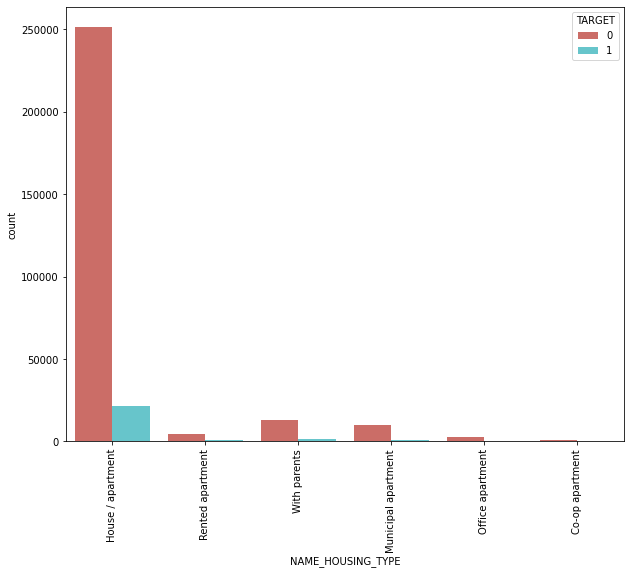

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='NAME_HOUSING_TYPE', data=hci, palette='hls', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

change it into two types namely private private house and non-private house

In [66]:
def house(x):
  if x == 'House / apartment' : 
    return 'private residence'
  elif x == 'With parents' :
    return 'private residence'
  else :
    return 'non-private residence'

In [67]:
hci['NAME_HOUSING_TYPE'] = hci['NAME_HOUSING_TYPE'].apply(house)
hci['NAME_HOUSING_TYPE'].value_counts()

private residence        287287
non-private residence     19758
Name: NAME_HOUSING_TYPE, dtype: int64

### **DAYS_BIRTH**

Mengubah fitur umur dalam hitungan hari ke dalam tahun 

In [68]:
hci['DAYS_BIRTH'].describe()

count    307045.000000
mean     -16039.285255
std        4363.518855
min      -25229.000000
25%      -19684.000000
50%      -15753.000000
75%      -12416.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [69]:
hci['AGE'] = (hci['DAYS_BIRTH'] * (-1) ) / 365
hci['AGE'] = np.floor(hci['AGE']).astype(int)
hci[['DAYS_BIRTH','AGE']].head()

,DAYS_BIRTH,AGE
0,-9461,25
1,-16765,45
2,-19046,52
3,-19005,52
4,-19932,54


In [70]:
hci['AGE'].describe()

count    307045.000000
mean         43.442196
std          11.953322
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

Mencategorikan umur kedalam 5 tingkatan 

In [71]:
def cat_age(x):
  if x < 20 :
    return 'under twenty'
  elif ( x >= 20) & (x < 30):
    return 'Twenty'
  elif ( x >= 30) & (x < 40):
    return 'Thirty'
  elif ( x >= 40) & (x < 50):
    return 'Fourty'
  elif ( x >= 50) & (x < 60):
    return 'Fifty'
  else :
    return 'Above 60'

In [72]:
age = hci[['SK_ID_CURR','TARGET','DAYS_BIRTH','AGE']]
age['Category_AGE'] = age['AGE'].apply(cat_age)
age.head()

,SK_ID_CURR,TARGET,DAYS_BIRTH,AGE,Category_AGE
0,100002,1,-9461,25,Twenty
1,100003,0,-16765,45,Fourty
2,100004,0,-19046,52,Fifty
3,100006,0,-19005,52,Fifty
4,100007,0,-19932,54,Fifty


In [119]:
def barPerc(df,xVar,ax):

    numX=len([x for x in df[xVar].unique() if x==x])

    bars = ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])

        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

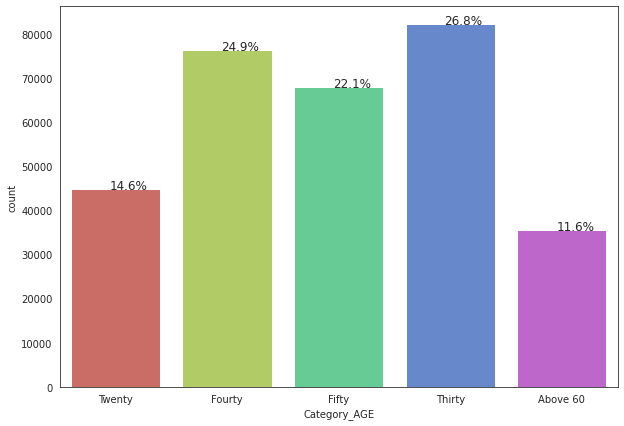

In [121]:
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.countplot(x='Category_AGE', data=age, palette='hls')
without_hue(ax, hci['AGE'])
plt.show()

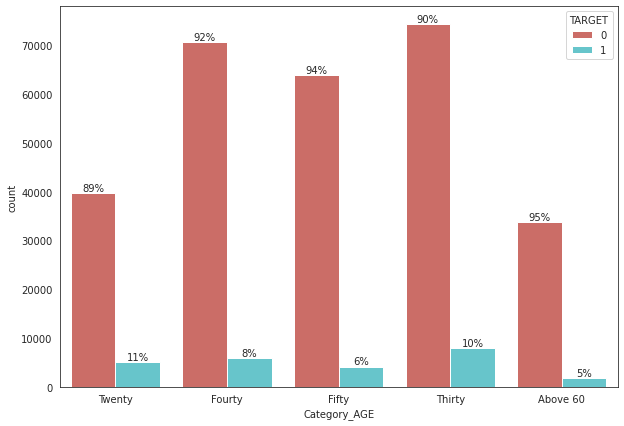

In [117]:
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.countplot(x='Category_AGE', data=age, palette='hls', hue='TARGET')

barPerc(age, 'Category_AGE',ax)
plt.show()


### **DAYS_EMPLOYED**

In [76]:
hci['DAYS_EMPLOYED'].value_counts()

 365243    55320
-200         156
-224         152
-199         151
-230         151
           ...  
-9808          1
-11983         1
-10328         1
-11598         1
-8694          1
Name: DAYS_EMPLOYED, Length: 12571, dtype: int64

In [77]:
# cek arti 365243 dalam kolom days employed
hci[['AGE','DAYS_EMPLOYED','NAME_INCOME_TYPE']][((hci['DAYS_EMPLOYED'] == 365243) & (hci['NAME_INCOME_TYPE'] != 'Pensioner') )].head()

# 365243 adalah klien yang belum bekerja atau yang sudah pensiun

,AGE,DAYS_EMPLOYED,NAME_INCOME_TYPE
1154,38,365243,Unemployed
3934,43,365243,Unemployed
23796,64,365243,Unemployed
35298,47,365243,Unemployed
37452,33,365243,Unemployed


In [78]:
hci['YEARS_EMPLOYED'] = (hci['DAYS_EMPLOYED'] * (-1) ) / 365
hci['YEARS_EMPLOYED'] = np.ceil(hci['YEARS_EMPLOYED']).astype(int)
hci[['DAYS_EMPLOYED','YEARS_EMPLOYED']].head()

,DAYS_EMPLOYED,YEARS_EMPLOYED
0,-637,2
1,-1188,4
2,-225,1
3,-3039,9
4,-3038,9


In [79]:
def e_years(x):
  if x == -1000: 
    return 0
  else :
    return x

In [80]:
hci['YEARS_EMPLOYED'] = hci['YEARS_EMPLOYED'].apply(e_years)

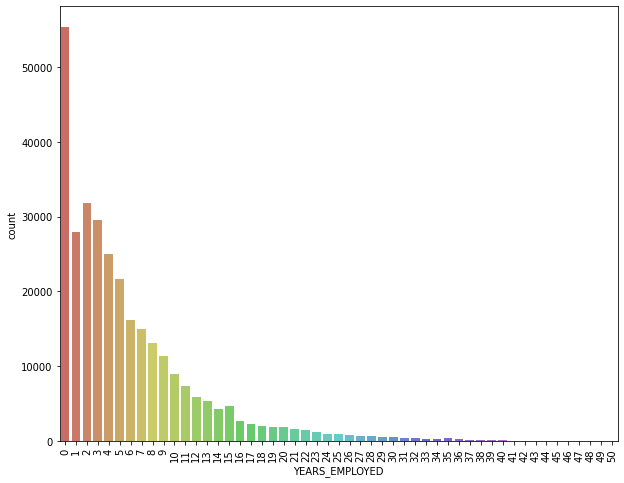

In [81]:
y_employed = hci[['SK_ID_CURR','TARGET','DAYS_EMPLOYED','YEARS_EMPLOYED']]

fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='YEARS_EMPLOYED', data=y_employed, palette='hls')
plt.xticks(rotation=90)
plt.show()

DAYS_REGISTRATION & DAYS_ID_PUBLISH

In [82]:
# UBAH nilai DAYS_REGISTRATION & DAYS_ID_PUBLISH ke bilangan postif
hci['DAYS_REGISTRATION'] = (hci['DAYS_REGISTRATION'] * (-1) )
hci['DAYS_ID_PUBLISH'] = (hci['DAYS_ID_PUBLISH'] * (-1) )
hci['DAYS_LAST_PHONE_CHANGE'] = (hci['DAYS_LAST_PHONE_CHANGE'] * (-1) )


hci['DAYS_REGISTRATION'] = hci['DAYS_REGISTRATION'].astype(int)
hci['DAYS_ID_PUBLISH'] = hci['DAYS_ID_PUBLISH'].astype(int)
hci['DAYS_LAST_PHONE_CHANGE'] = hci['DAYS_LAST_PHONE_CHANGE'].astype(int)


### **OCCUPATION_TYPE**

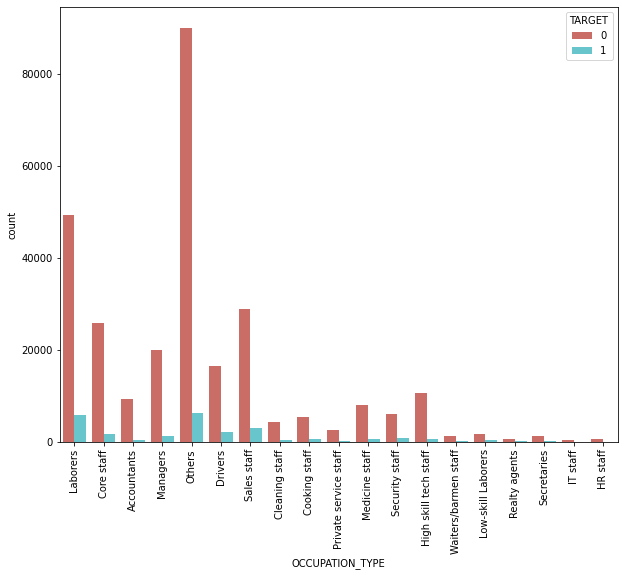

In [83]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='OCCUPATION_TYPE', data=hci, palette='hls', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [84]:
pd.set_option('display.max_rows', None)
hci.groupby(['TARGET','NAME_INCOME_TYPE', 'OCCUPATION_TYPE'])[['OCCUPATION_TYPE']].count()


OCCUPATION_TYPE
TARGET NAME_INCOME_TYPE     OCCUPATION_TYPE                       
0      Businessman          Core staff                           1
                            Managers                             7
                            Others                               2
       Commercial associate Accountants                       3781
                            Cleaning staff                     814
                            Cooking staff                     1188
                            Core staff                        6100
                            Drivers                           4416
                            HR staff                           203
                            High skill tech staff             3277
                            IT staff                           196
                            Laborers                         11633
                            Low-skill Laborers                 304
                            Managers                          8357
                            Medicine staff                     969
                            Others                           11459
                            Private service staff              940
                            Realty agents                      305
                            Sales staff                      10136
                            Secretaries                        320
                            Security staff                    1424
                            Waiters/barmen staff               339
       Maternity leave      Accountants                          1
                            Core staff                           1
                            Others                               1
       Pensioner            Medicine staff                       1
                            Others                           52327
                            Sales staff                          1
       State servant        Accountants                        695
                            Cleaning staff                     244
                            Cooking staff                      409
                            Core staff                        6596
                            Drivers                            746
                            HR staff                            62
                            High skill tech staff              984
                            IT staff                            48
                            Laborers                          1709
                            Low-skill Laborers                  24
                            Managers                          2057
                            Medicine staff                    2419
                            Others                            3577
                            Private service staff               33
                            Realty agents                        9
                            Sales staff                        161
                            Secretaries                        248
                            Security staff                     349
                            Waiters/barmen staff                50
       Student              Accountants                          1
                            Core staff                           3
                            Drivers                              1
                            Laborers                             5
                            Low-skill Laborers                   2
                            Others                               5
                            Waiters/barmen staff                 1
       Unemployed           Others                              14
       Working              Accountants                       4842
                            Cleaning staff                    3140
                            Cooking staff                     3718
                            Cor

In [85]:
pd.reset_option('display.max_rows')


### **CNT_FAM_MEMBERS**

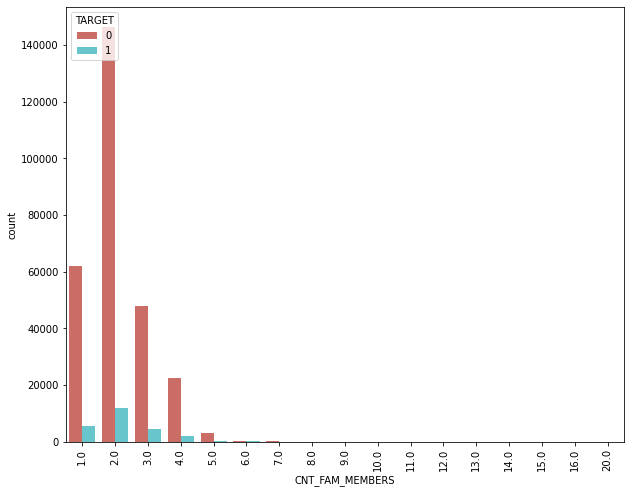

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='CNT_FAM_MEMBERS', data=hci, palette='hls', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

### **WEEKDAY_APPR_PROCESS_START**

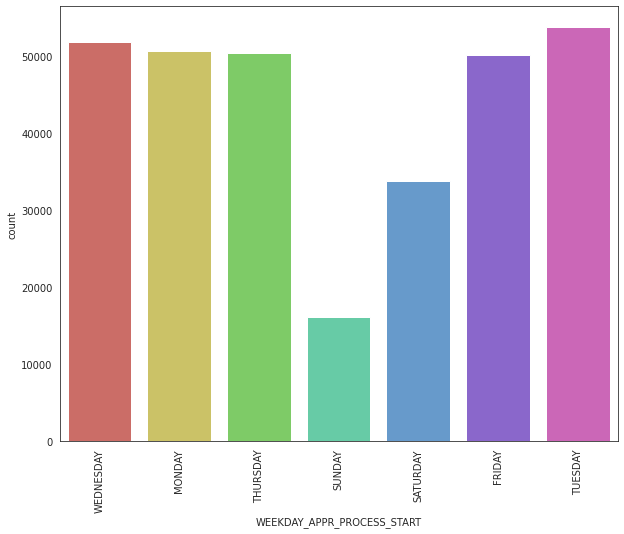

In [87]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=hci, palette='hls')
plt.xticks(rotation=90)
plt.show()

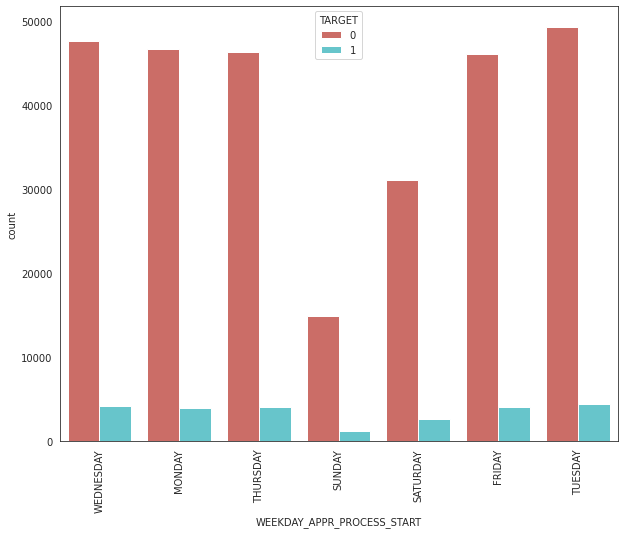

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=hci, palette='hls', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

### **HOUR_APPR_PROCESS_START**

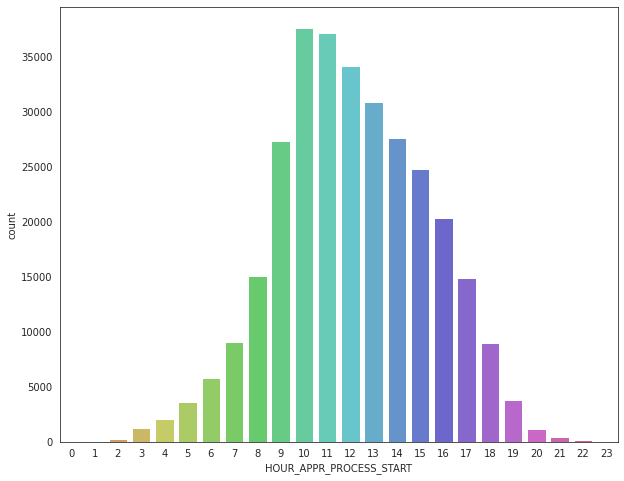

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='HOUR_APPR_PROCESS_START', data=hci, palette='hls')
plt.show()

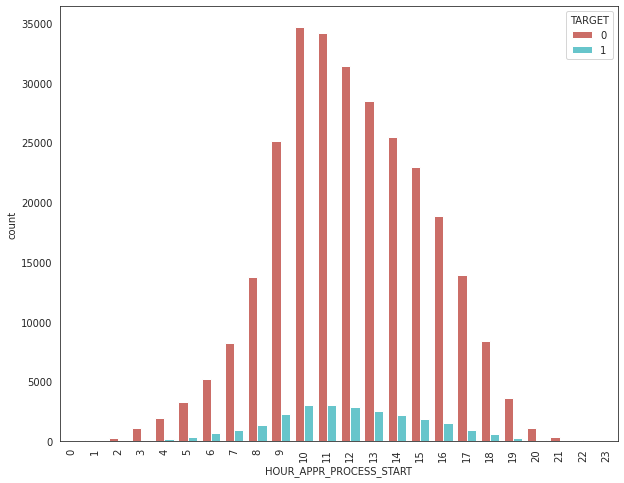

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='HOUR_APPR_PROCESS_START', data=hci,palette='hls', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

### ORGANIZATION_TYPE

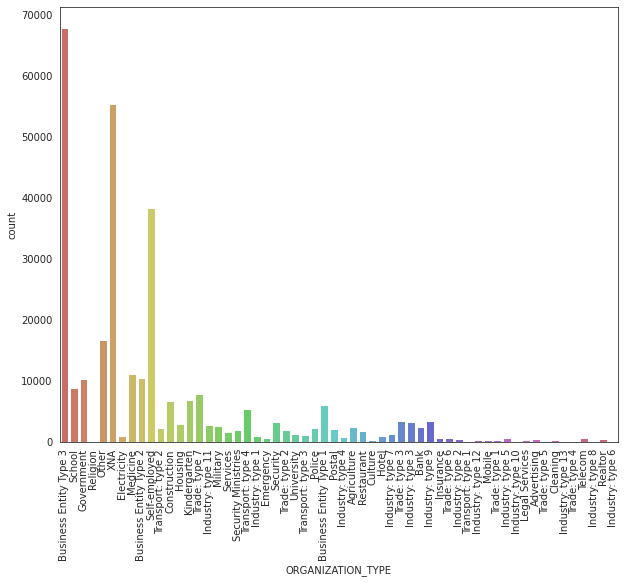

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(x='ORGANIZATION_TYPE', data=hci,palette='hls' )
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

**Label Encoding**

In [92]:
def education(x):
  if x == 'Secondary / secondary special':
    return '1'
  elif x == 'Higher education':
    return '2'
  elif x == 'Incomplete higher' :
    return '1'
  elif x == 'Lower secondary' :
    return '0'
  elif x == 'Academic degree' :
    return '3'


In [93]:
hci['NAME_CONTRACT_TYPE'] = hci['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1}).astype('int')
hci['CODE_GENDER'] = hci['CODE_GENDER'].map({'M': 0, 'F': 1}).astype('int')
hci['FLAG_OWN_CAR'] = hci['FLAG_OWN_CAR'].map({'Y': 0, 'N': 1}).astype('int')
hci['FLAG_OWN_REALTY'] = hci['FLAG_OWN_REALTY'].map({'Y': 0, 'N': 1}).astype('int')
hci['NAME_TYPE_SUITE'] = hci['NAME_TYPE_SUITE'].map({'Unaccompanied': 0, 'Accompanied': 1}).astype('int')


hci['NAME_EDUCATION_TYPE'] = hci['NAME_EDUCATION_TYPE'].apply(education).astype('int')

hci['NAME_FAMILY_STATUS'] = hci['NAME_FAMILY_STATUS'].map({'Single': 0, 'Married': 1}).astype('int')
hci['NAME_HOUSING_TYPE'] = hci['NAME_HOUSING_TYPE'].map({'private residence': 0, 'non-private residence': 1}).astype('int')



**One-Hot Encoding**

In [94]:
onehot_columns = ['NAME_INCOME_TYPE','OCCUPATION_TYPE']
hci = pd.get_dummies(hci, columns = onehot_columns, drop_first=True)
hci

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Others,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,100002,1,0,0,1,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,1,1,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,0,0,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,1,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307040,456251,0,0,0,1,1,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,1,0,0,0
307041,456252,0,0,1,1,0,0,72000.0,269550.0,12001.5,...,0,0,0,1,0,0,0,0,0,0
307042,456253,0,0,1,1,0,0,153000.0,677664.0,29979.0,...,0,1,0,0,0,0,0,0,0,0
307043,456254,1,0,1,1,0,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection

In [95]:
hci_cleaned = hci.reset_index(drop=True).copy()

In [96]:
hci_cleaned.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307045 entries, 0 to 307044
Data columns (total 100 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   SK_ID_CURR                             307045 non-null  int64  
 1   TARGET                                 307045 non-null  int64  
 2   NAME_CONTRACT_TYPE                     307045 non-null  int64  
 3   CODE_GENDER                            307045 non-null  int64  
 4   FLAG_OWN_CAR                           307045 non-null  int64  
 5   FLAG_OWN_REALTY                        307045 non-null  int64  
 6   CNT_CHILDREN                           307045 non-null  int64  
 7   AMT_INCOME_TOTAL                       307045 non-null  float64
 8   AMT_CREDIT                             307045 non-null  float64
 9   AMT_ANNUITY                            307045 non-null  float64
 10  AMT_GOODS_PRICE                        307045 non-null 

column that will be dropped because it does not have a relationship with the target: 

*   SK_ID_CURR
*   WEEKDAY_APPR_PROCESS_START
*   HOUR_APPR_PROCESS_START





In [97]:
hci_cleaned = hci_cleaned.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','SK_ID_CURR'] ,axis=1)

Column that will be dropped because the information is already covered by another column:


*   DAYS_BIRTH 
*   DAYS_EMPLOYED
*   ORGANIZATION_TYPE



In [98]:
hci_cleaned = hci_cleaned.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED','ORGANIZATION_TYPE'] ,axis=1)

**Univariate selection**

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = hci_cleaned.drop(['TARGET'], axis=1)
y = hci_cleaned['TARGET']

In [100]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)

In [101]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [102]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


In [103]:
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
8,AMT_GOODS_PRICE,122342332.643
6,AMT_CREDIT,76663939.244
5,AMT_INCOME_TOTAL,1594287.864
14,DAYS_REGISTRATION,1346505.730
39,DAYS_LAST_PHONE_CHANGE,665680.332
15,DAYS_ID_PUBLISH,617644.114
7,AMT_ANNUITY,389624.719
66,AGE,6204.797
67,YEARS_EMPLOYED,4219.570
34,EXT_SOURCE_3,771.450


features that have low correlation will be dropped

In [104]:
pd.reset_option('display.max_rows')
pd.reset_option('display.float_format')

# Model & Evalution

In [105]:
final_data = hci_cleaned.copy()

Split Data

In [106]:
# split train test

X = final_data.drop(columns='TARGET')
y = final_data[['TARGET']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Handle Imbalance Data

In [107]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train['TARGET']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, 
                                                        y_train)

# summarize class distribution
print(Counter(y_train_under['TARGET']))

Counter({0: 225802, 1: 19834})
Counter({0: 19834, 1: 19834})


Modeling

In [108]:
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(random_state = 42)
XGBoost = xgb.XGBClassifier(random_state=42)
logreg = LogisticRegression()

classification = [logreg, DT, RF, XGBoost]

model = pd.DataFrame(columns = ['Method', 'Precision', 'Recall', 'F1-Score', 'Accuracy','AUC'])
model

,Method,Precision,Recall,F1-Score,Accuracy,AUC


In [109]:
for models in classification:
    models.fit(X_train_under, y_train_under)
    y_pred = models.predict(X_test)

    method = str(type(models)).split('.')[-1][:-2]
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall)/(precision + recall)
    acc = accuracy_score(y_test, y_pred)
    aoc = roc_auc_score(y_test, models.predict_proba(X_test)[:,1])

    model = model.append({'Method': method, 
                    'Precision': precision, 
                    'Recall': recall,
                    'F1-Score': f1,
                    'Accuracy': acc,
                    'AUC': aoc},
                     ignore_index=True)


In [110]:
model 

,Method,Precision,Recall,F1-Score,Accuracy,AUC
0,LogisticRegression,0.112386,0.496166,0.183261,0.643082,0.601262
1,DecisionTreeClassifier,0.108063,0.573850,0.181876,0.583351,0.579017
2,RandomForestClassifier,0.156023,0.663035,0.252604,0.683353,0.734824
3,XGBClassifier,0.158374,0.691687,0.257735,0.678467,0.748364


Matrix used in the selection of the model by using the Recall. <br>
**XGBClassifier** has a higher Recall than the others

Hyperparameters Tuning

In [111]:
clf_xgb = xgb.XGBClassifier(random_state = 42)

from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': (4,5,6),
    'learning_rate': (0.05,0.1)
}

# note: we use recall
clf_xgb_gridcv = GridSearchCV(clf_xgb, parameters, cv=5, n_jobs = -1, scoring='recall')

clf_xgb_gridcv.fit(X_train_under, y_train_under)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': (0.05, 0.1), 'max_depth': (4, 5, 6)},
             scoring='recall')

In [112]:
cv_result = pd.DataFrame(clf_xgb_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'learning_rate': 0.05, 'max_depth': 5}",0.686044,1
0,"{'learning_rate': 0.05, 'max_depth': 4}",0.685540,2
5,"{'learning_rate': 0.1, 'max_depth': 6}",0.683372,3
2,"{'learning_rate': 0.05, 'max_depth': 6}",0.683322,4
3,"{'learning_rate': 0.1, 'max_depth': 4}",0.683171,5
4,"{'learning_rate': 0.1, 'max_depth': 5}",0.681910,6


In [113]:
y_pred = clf_xgb_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     56453
           1       0.16      0.69      0.26      4956

    accuracy                           0.68     61409
   macro avg       0.56      0.68      0.53     61409
weighted avg       0.90      0.68      0.75     61409



In [114]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
aoc = roc_auc_score(y_test, models.predict_proba(X_test)[:,1])
acc = accuracy_score(y_test, y_pred)
print('Assuming 1 as positive, we get:')
print('')
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)

print('')

precision = tp/(tp+fp)
recall = tp/(tp+fn)
    
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', 2 * (precision * recall)/(precision + recall))
print('Acuracy:', acc)
print('AOC:', aoc)

Assuming 1 as positive, we get:

True Positive: 3422
True Negative: 38256
False Positive: 18197
False Negative: 1534

Precision: 0.1582866922614367
Recall: 0.6904761904761905
F1-Score: 0.2575352775164628
Acuracy: 0.6786953052484164
AOC: 0.7483641316288062


In [143]:
XGBoost = xgb.XGBClassifier(random_state=42)
XGBoost.fit(X_train_under, y_train_under)

XGBClassifier(random_state=42)

**confusion matrix & Feature Importance**

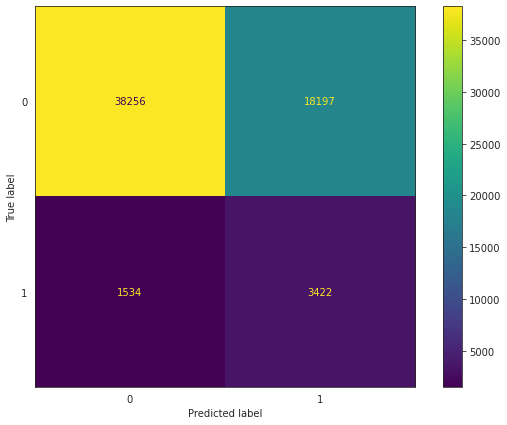

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score

fig, ax = plt.subplots(figsize=(10,7))
y_pred = clf_xgb_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf_xgb_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf_xgb_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

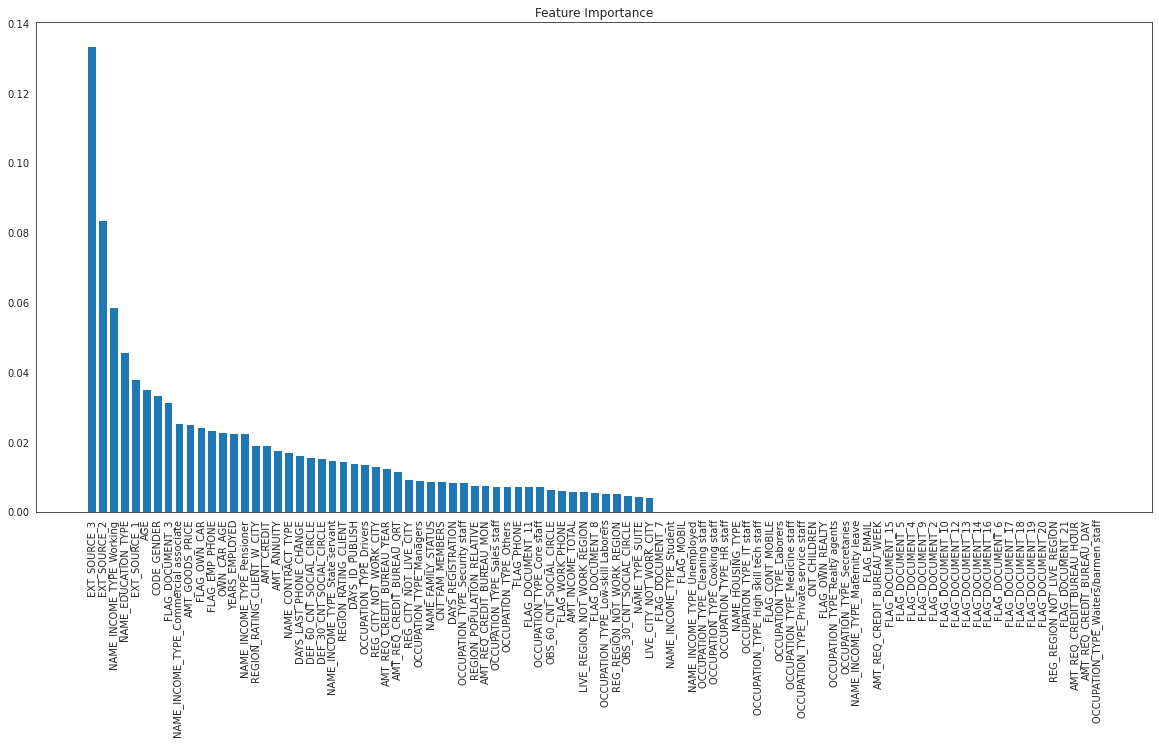

In [141]:
from sklearn.inspection import permutation_importance
importances = clf_xgb_gridcv.best_estimator_.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 9))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)

plt.show()